<a href="https://colab.research.google.com/github/zzickso/OpenCV/blob/main/selective_search_n_iou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

#### selectivesearch를 설치하고 이미지를 로드

In [3]:
pip install selectivesearch

img shape: (450, 375, 3)


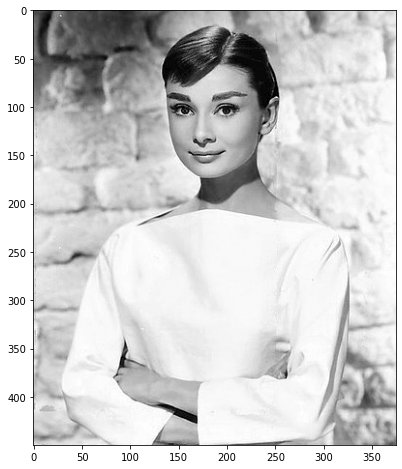

In [9]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [10]:
import selectivesearch 

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 39


#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기. 
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
* size는 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐. 

In [11]:
regions

[{'labels': [0.0], 'rect': (0, 0, 79, 100), 'size': 4121},
 {'labels': [1.0], 'rect': (15, 0, 124, 51), 'size': 5008},
 {'labels': [2.0], 'rect': (118, 0, 256, 177), 'size': 22612},
 {'labels': [3.0], 'rect': (134, 17, 74, 62), 'size': 2885},
 {'labels': [4.0], 'rect': (72, 26, 82, 77), 'size': 3759},
 {'labels': [5.0], 'rect': (136, 53, 85, 118), 'size': 4182},
 {'labels': [6.0], 'rect': (164, 60, 89, 139), 'size': 6706},
 {'labels': [7.0], 'rect': (0, 73, 106, 95), 'size': 6964},
 {'labels': [8.0], 'rect': (286, 86, 88, 245), 'size': 11000},
 {'labels': [9.0], 'rect': (27, 91, 156, 123), 'size': 7854},
 {'labels': [10.0], 'rect': (232, 124, 104, 103), 'size': 3493},
 {'labels': [11.0], 'rect': (0, 162, 76, 49), 'size': 3024},
 {'labels': [12.0], 'rect': (72, 165, 287, 256), 'size': 43061},
 {'labels': [13.0], 'rect': (0, 206, 118, 61), 'size': 3929},
 {'labels': [14.0], 'rect': (0, 240, 171, 209), 'size': 17729},
 {'labels': [15.0], 'rect': (0, 252, 66, 59), 'size': 2619},
 {'labels'

In [12]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 79, 100), (15, 0, 124, 51), (118, 0, 256, 177), (134, 17, 74, 62), (72, 26, 82, 77), (136, 53, 85, 118), (164, 60, 89, 139), (0, 73, 106, 95), (286, 86, 88, 245), (27, 91, 156, 123), (232, 124, 104, 103), (0, 162, 76, 49), (72, 165, 287, 256), (0, 206, 118, 61), (0, 240, 171, 209), (0, 252, 66, 59), (171, 321, 189, 128), (326, 327, 48, 84), (84, 360, 91, 67), (204, 369, 170, 80), (136, 53, 117, 146), (0, 206, 118, 105), (0, 73, 183, 141), (0, 0, 139, 100), (0, 73, 183, 141), (0, 0, 208, 100), (72, 26, 181, 173), (171, 86, 203, 363), (0, 73, 183, 238), (118, 0, 256, 227), (72, 86, 302, 363), (0, 0, 253, 199), (0, 73, 183, 376), (0, 73, 183, 376), (72, 86, 302, 363), (0, 0, 374, 227), (0, 73, 374, 376), (0, 73, 374, 376), (0, 0, 374, 449)]


**bounding box를 시각화 하기**

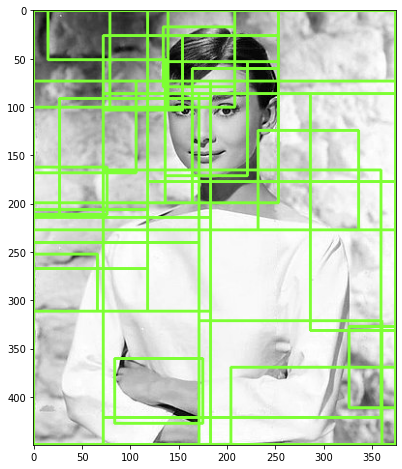

In [13]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

#### bounding box의 크기가 큰 후보만 추출

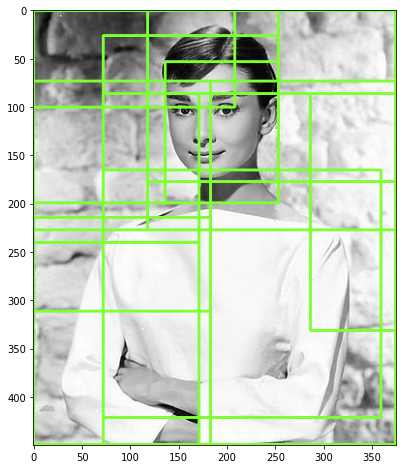

In [14]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### IOU 구하기

#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [15]:
import numpy as np 

def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

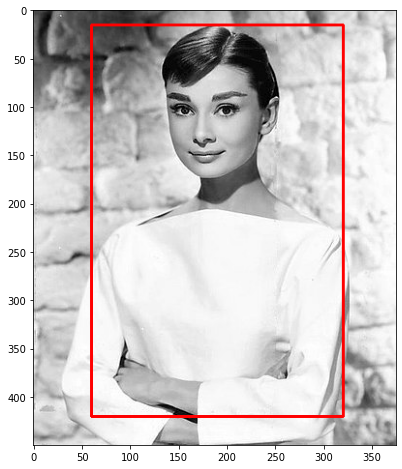

In [18]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 
gt_box = [60, 15, 320, 420]


img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [19]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 47


In [20]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.0
index: 1 iou: 0.08394995291268667
index: 2 iou: 0.3683236994219653
index: 3 iou: 0.9874899187876287
index: 4 iou: 0.3340913651260785
index: 5 iou: 0.9748907882241216
index: 6 iou: 0.09202279202279202
index: 7 iou: 0.042867996201329535
index: 8 iou: 0.2500854700854701
index: 9 iou: 0.0
index: 10 iou: 0.09525166191832858
index: 11 iou: 0.11748338081671415
index: 12 iou: 0.0547008547008547
index: 13 iou: 0.0
index: 14 iou: 0.54997150997151
index: 15 iou: 0.0
index: 16 iou: 0.13903133903133902
index: 17 iou: 0.0
index: 18 iou: 0.0
index: 19 iou: 0.0
index: 20 iou: 0.12894586894586896
index: 21 iou: 0.05210826210826211
index: 22 iou: 0.009348810110697799
index: 23 iou: 0.0
index: 24 iou: 0.1622222222222222
index: 25 iou: 0.3265906932573599
index: 26 iou: 0.6102754036087369
index: 27 iou: 0.6102754036087369
index: 28 iou: 0.12401975021783329
index: 29 iou: 0.14757660414172322
index: 30 iou: 0.2500854700854701
index: 31 iou: 0.3340913651260785
index: 32 iou: 0.40489187931107

In [21]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 57, 168),
 (0, 0, 320, 199),
 (0, 0, 320, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 15, 171, 434),
 (0, 15, 171, 434),
 (0, 15, 171, 434),
 (0, 15, 171, 434),
 (0, 15, 318, 434),
 (0, 276, 57, 169),
 (15, 0, 305, 79),
 (15, 0, 305, 199),
 (62, 17, 256, 401),
 (63, 0, 311, 449),
 (63, 18, 114, 85),
 (63, 18, 190, 181),
 (63, 165, 254, 228),
 (63, 165, 254, 253),
 (63, 165, 254, 253),
 (63, 165, 311, 284),
 (82, 359, 292, 90),
 (82, 359, 292, 90),
 (136, 53, 117, 146),
 (164, 60, 89, 139),
 (171, 324, 146, 93),
 (191, 0, 183, 420),
 (191, 0, 183, 420),
 (191, 18, 126, 209),
 (191, 18, 126, 209),
 (202, 0, 172, 420),
 (202, 0, 172, 420),
 (323, 23, 51, 308)]

img shape: (450, 375, 3)
index: 3 iou: 0.9874899187876287 rectangle: (59, 14, 321, 421)
index: 5 iou: 0.9748907882241216 rectangle: (62, 17, 318, 418)
index: 11 iou: 0.54997150997151 rectangle: (63, 165, 317, 393)
index: 21 iou: 0.6102754036087369 rectangle: (63, 165, 317, 418)
index: 22 iou: 0.6102754036087369 rectangle: (63, 165, 317, 418)
index: 36 iou: 0.5116364402876126 rectangle: (63, 165, 374, 449)
index: 37 iou: 0.7526904957427497 rectangle: (0, 15, 318, 449)
index: 38 iou: 0.7389566501483806 rectangle: (63, 0, 374, 449)
index: 39 iou: 0.7328786191536748 rectangle: (0, 0, 320, 449)
index: 40 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 41 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)


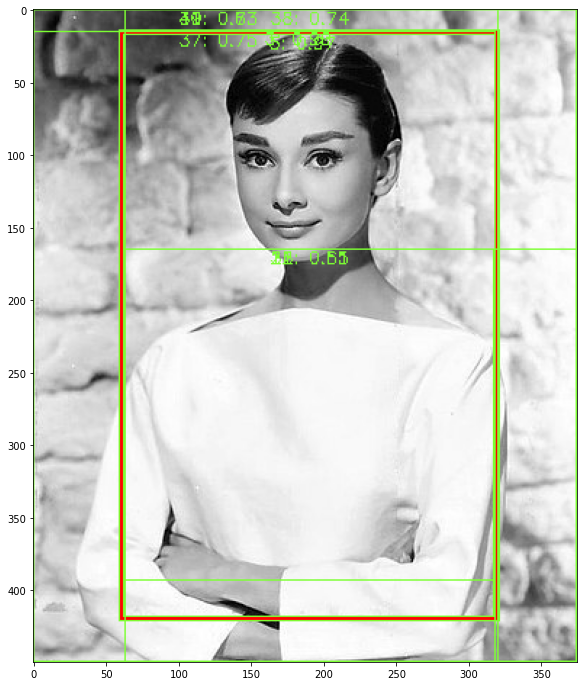

In [23]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCV/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()
    